In [1]:
import numpy as np
from scipy.linalg import expm

# Define the matrices A and B
A = np.array([[1, 0], [0, -1]])
B = np.array([[0, 1], [-1, 0]])

# Initial condition
u0 = np.array([1, 0])

# Time step
dt = 0.1

# Function to compute the exponential of a matrix
def expm_multiply(M, v, dt):
    return expm(M * dt) @ v

# Lie-Trotter Splitting
def lie_trotter(A, B, u0, dt):
    u1 = expm_multiply(A, u0, dt)
    u_final = expm_multiply(B, u1, dt)
    return u_final

# Strang Splitting
def strang_splitting(A, B, u0, dt):
    u1 = expm_multiply(A, u0, dt / 2)
    u2 = expm_multiply(B, u1, dt)
    u_final = expm_multiply(A, u2, dt / 2)
    return u_final

# Apply the methods
u_lie_trotter = lie_trotter(A, B, u0, dt)
u_strang = strang_splitting(A, B, u0, dt)

print("Lie-Trotter result:", u_lie_trotter)
print("Strang Splitting result:", u_strang)


Lie-Trotter result: [ 1.09964967 -0.11033299]
Strang Splitting result: [ 1.09964967 -0.09983342]


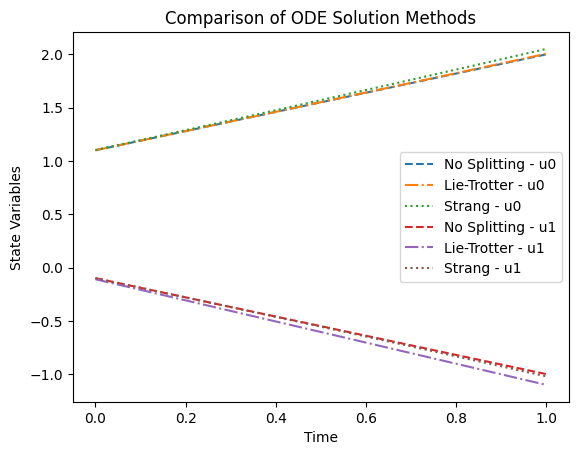

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrices A and B with explicit data type
A = np.array([[1, 0], [0, -1]], dtype=float)
B = np.array([[0, 1], [-1, 0]], dtype=float)

# Initial condition with explicit data type
u0 = np.array([1, 0], dtype=float)

# Time step and total time
dt = 0.1
T = 1.0
steps = int(T / dt)

# Function to simulate the system without splitting
def simulate_system(A, B, u0, dt, steps):
    u = u0.copy()
    for _ in range(steps):
        u += dt * (A @ u + B @ u)  # Euler method
    return u

# Function for Lie-Trotter Splitting
def lie_trotter_splitting(A, B, u0, dt, steps):
    u = u0.copy()
    for _ in range(steps):
        u += dt * A @ u  # First half-step with A
        u += dt * B @ u  # Second half-step with B
    return u

# Function for Strang Splitting
def strang_splitting(A, B, u0, dt, steps):
    u = u0.copy()
    for _ in range(steps):
        u += (dt / 2) * A @ u  # First quarter-step with A
        u += dt * B @ u       # Half-step with B
        u += (dt / 2) * A @ u  # Last quarter-step with A
    return u

# Simulate the system using different methods
u_no_split = simulate_system(A, B, u0, dt, steps)
u_lie_trotter = lie_trotter_splitting(A, B, u0, dt, steps)
u_strang = strang_splitting(A, B, u0, dt, steps)

# Plotting the results
time_points = np.linspace(0, T, steps)
results_no_split = np.array([simulate_system(A, B, u0, dt, i) for i in range(1, steps+1)])
results_lie_trotter = np.array([lie_trotter_splitting(A, B, u0, dt, i) for i in range(1, steps+1)])
results_strang = np.array([strang_splitting(A, B, u0, dt, i) for i in range(1, steps+1)])

plt.plot(time_points, results_no_split[:, 0], label='No Splitting - u0', linestyle='--')
plt.plot(time_points, results_lie_trotter[:, 0], label='Lie-Trotter - u0', linestyle='-.')
plt.plot(time_points, results_strang[:, 0], label='Strang - u0', linestyle=':')

plt.plot(time_points, results_no_split[:, 1], label='No Splitting - u1', linestyle='--')
plt.plot(time_points, results_lie_trotter[:, 1], label='Lie-Trotter - u1', linestyle='-.')
plt.plot(time_points, results_strang[:, 1], label='Strang - u1', linestyle=':')

plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Comparison of ODE Solution Methods')
plt.legend()
plt.show()
